In [1]:
!pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set(style="whitegrid")

In [3]:
# Sample dataset with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, np.nan, 30, 22, np.nan],
    'Salary': [50000, 60000, np.nan, 45000, 70000],
    'Score': [85, 90, 88, np.nan, 92]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the original dataset
print("Original Dataset:")
print(df)

Original Dataset:
      Name   Age   Salary  Score
0    Alice  25.0  50000.0   85.0
1      Bob   NaN  60000.0   90.0
2  Charlie  30.0      NaN   88.0
3    David  22.0  45000.0    NaN
4      Eve   NaN  70000.0   92.0



Missing Values Count:
Name      0
Age       2
Salary    1
Score     1
dtype: int64


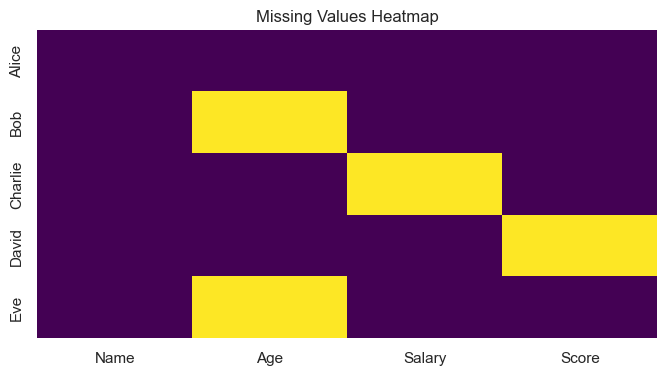

In [4]:
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Visualize missing values with a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=df['Name'])
plt.title('Missing Values Heatmap')
plt.show()

In [5]:
# 1. Drop rows with any missing values
df_dropped = df.dropna()
print("\nAfter Dropping Rows with Missing Values:")
print(df_dropped)

# 2. Fill missing values with a constant (e.g., 0)
df_filled_constant = df.fillna(0)
print("\nAfter Filling Missing Values with 0:")
print(df_filled_constant)

# 3. Impute with mean for numeric columns
df_imputed_mean = df.copy()
for column in ['Age', 'Salary', 'Score']:
    df_imputed_mean[column].fillna(df[column].mean(), inplace=True)
print("\nAfter Imputing Missing Values with Mean:")
print(df_imputed_mean)


After Dropping Rows with Missing Values:
    Name   Age   Salary  Score
0  Alice  25.0  50000.0   85.0

After Filling Missing Values with 0:
      Name   Age   Salary  Score
0    Alice  25.0  50000.0   85.0
1      Bob   0.0  60000.0   90.0
2  Charlie  30.0      0.0   88.0
3    David  22.0  45000.0    0.0
4      Eve   0.0  70000.0   92.0

After Imputing Missing Values with Mean:
      Name        Age   Salary  Score
0    Alice  25.000000  50000.0  85.00
1      Bob  25.666667  60000.0  90.00
2  Charlie  30.000000  56250.0  88.00
3    David  22.000000  45000.0  88.75
4      Eve  25.666667  70000.0  92.00


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13576\2556390903.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed_mean[column].fillna(df[column].mean(), inplace=True)


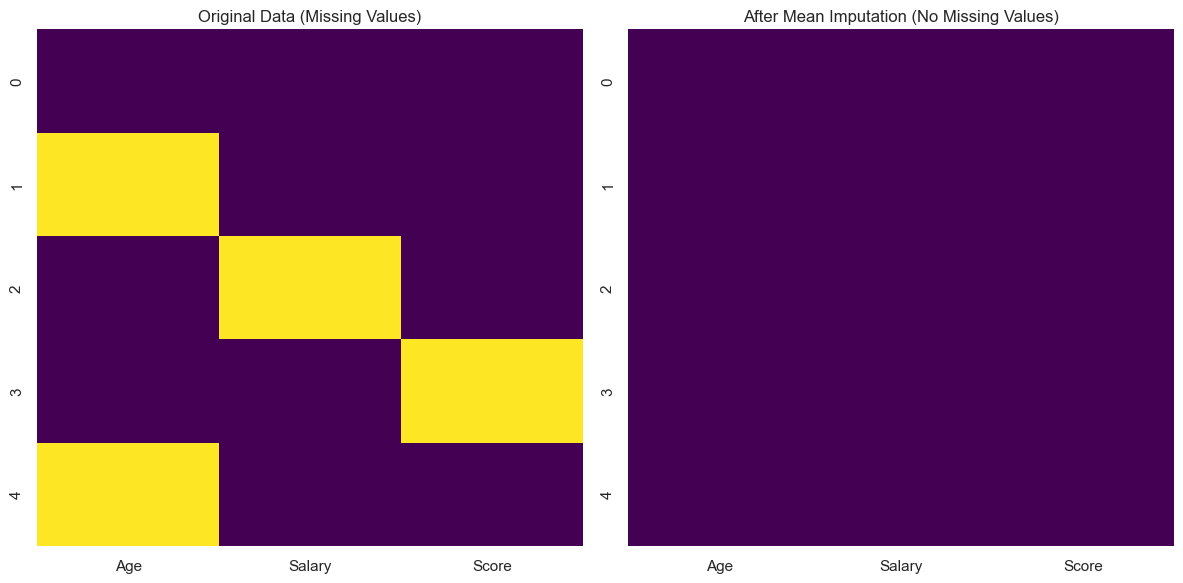

In [6]:
# Plot comparison of original vs imputed data
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.heatmap(df[['Age', 'Salary', 'Score']].isnull(), cbar=False, cmap='viridis')
plt.title('Original Data (Missing Values)')

# Imputed data
plt.subplot(1, 2, 2)
sns.heatmap(df_imputed_mean[['Age', 'Salary', 'Score']].isnull(), cbar=False, cmap='viridis')
plt.title('After Mean Imputation (No Missing Values)')

plt.tight_layout()
plt.show()

In [7]:
# Save the imputed dataset
df_imputed_mean.to_csv('cleaned_data.csv', index=False)
print("Cleaned dataset saved to 'cleaned_data.csv'")

Cleaned dataset saved to 'cleaned_data.csv'
